# Campo magnético Vs corriente

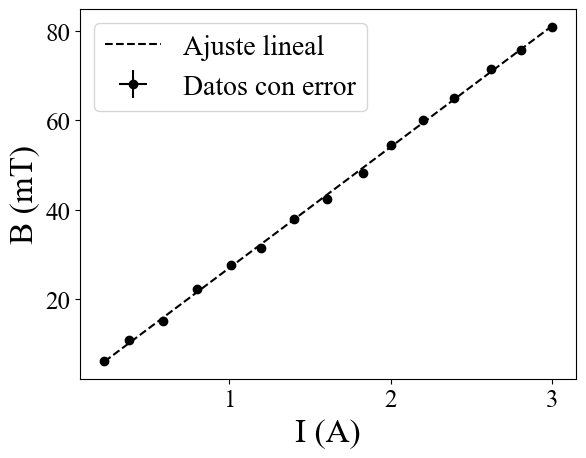

Pendiente (slope): 27.15 mT/A
Intercepto: -0.27 mT
Desviación estándar de la pendiente: 0.2 mT/A
Desviación estándar del intercepto: 0.63 mT


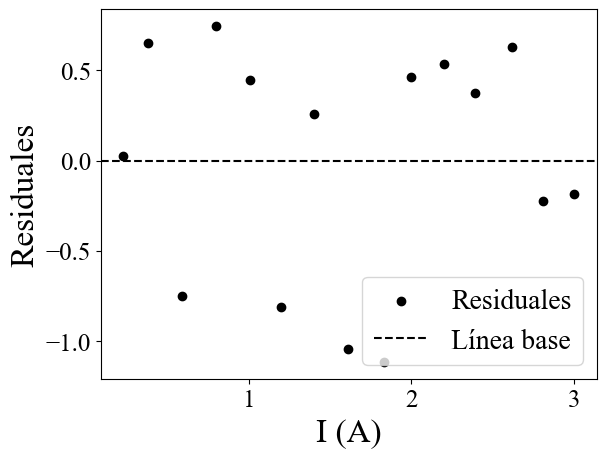

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos
I = np.array([0.23, 0.38, 0.59, 0.80, 1.01, 1.20, 1.40, 1.61, 1.83, 2.00, 2.20, 2.39, 2.62, 2.81, 3.00])
B = np.array([6.0, 10.7, 15.0, 22.2, 27.6, 31.5, 38.0, 42.4, 48.3, 54.5, 60.0, 65.0, 71.5, 75.8, 81.0])
error_I = 0.01  # Barras de error en el eje x
error_B = 0.1   # Barras de error en el eje y

# Ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(I, B)

# Predicciones usando la recta ajustada
fit_line = slope * I + intercept

# Residuales
residuals = B - fit_line

# Graficar los datos y la recta ajustada con barras de error
plt.errorbar(I, B, xerr=error_I, yerr=error_B, fmt='o', label='Datos con error', color='black')
plt.plot(I, fit_line, color='black', label='Ajuste lineal', linestyle='--')

# Configurar el gráfico
plt.xlabel('I (A)', fontsize=24)
plt.ylabel('B (mT)', fontsize=24)
plt.legend(fontsize=20)

# Mostrar la gráfica
plt.show()

# Imprimir los parámetros del ajuste
print(f"Pendiente (slope): {round(slope,2)} mT/A")
print(f"Intercepto: {round(intercept,2)} mT")
print(f"Desviación estándar de la pendiente: {round(std_err,2)} mT/A")
print(f"Desviación estándar del intercepto: {round(np.std(residuals),2)} mT")

# Graficar los residuales
plt.scatter(I, residuals, label='Residuales', color='black')
plt.axhline(0, color='black', linestyle='--', label='Línea base')

# Configurar el gráfico de residuales
plt.xlabel('I (A)', fontsize=24)
plt.ylabel('Residuales', fontsize=24)
plt.legend(fontsize=20)

# Mostrar la gráfica de residuales
plt.show()


# Curvas de histéresis

Se tienen datos de número de mínimos ($n$) y de corriete ( $I(A)$ ). Se requieren datos de ($ \frac{\Delta \ell}{\ell} $) y campo magnético ( $B(mT)$ ). En el laboratorio se miden las logitudes ($\ell$) del níquel, cobre y hierro (el cobre se desprecia pues no presenta el fenómeno en cuestión:

$$ \ell_{Ni} = 14,20\;  cm \pm 0.05\; cm $$

$$ \ell_{Fe} = 14,30\;  cm \pm 0.05\; cm $$

El láser usado fue un láser HeNe HLNS008L con una longitud de onda exactamente de $\lambda = 632.8 nm$ según lo reportado en la literatura. (https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=1516)


Para hallar $\Delta \ell$ usamos la siguiente relación:

$$\Delta \ell = n\frac{\lambda}{2}$$

Note que $n$ no tiene incertidumbre y $\lambda$ no tiene incertidumbre resportada. Por tanto $\Delta \ell$ no tiene incertidumbre asociada. Así para $ \frac{\Delta \ell}{\ell} $ se obtiene:

$$ \delta\left (\frac{\Delta \ell}{\ell}\right ) = \left | \frac{\partial  }{\partial \ell}\left (\frac{\Delta \ell}{\ell}\right ) \delta \ell  \right | $$

$$ \delta\left (\frac{\Delta \ell}{\ell}\right ) = \frac{\Delta \ell}{\ell^2}\:  \delta\ell $$



Ahora, para relacionar la corriente en el campo magnético usamos la constante (\alpha) hallada con anterioridad:

$$ \alpha = 27.15\; \frac{mT}{A} \pm 0.20\; \frac{mT}{A}, $$

De modo que 

$$B = \alpha I$$

y la incertidumbre asocidad es:

$$ \delta B = \sqrt{\left ( \frac{\partial B }{\partial \alpha } \; \delta \alpha \right )^{2}+\left ( \frac{\partial B}{\partial I} \: \delta I \right )^{2}} $$

$$ \delta B = \sqrt{\left ( I \; \delta \alpha \right )^{2}+\left ( \alpha  \: \delta I \right )^{2}} $$

Teniendo en cuenta que la incertidumbre en la corriente es de $\delta I = 0,01 A$

In [5]:
#Datos del Hierro:

import csv

# Nombre del archivo CSV
archivo_csv = 'Fe.csv'

# Listas para almacenar cada columna
n_Fe = []
I_Fe = []

# Leer el archivo CSV
with open(archivo_csv, 'r') as archivo:
    lector_csv = csv.reader(archivo, delimiter=';')

    # Saltar la primera línea si contiene encabezados
    next(lector_csv, None)

    # Leer y almacenar datos en las listas
    for fila in lector_csv:
        n_Fe.append(float(fila[0].replace(',', '.')))
        I_Fe.append(float(fila[1].replace(',', '.')))

# Imprimir las listas resultantes
print("Columna 'n Fe':", n_Fe)
print("Columna 'I Fe (A)':", I_Fe)


Columna 'n Fe': [0.5, 1.0, 1.5, 2.0, 1.5, 1.0, 2.0, 2.5, 3.0, 3.5, 2.5, 2.0]
Columna 'I Fe (A)': [0.48, 0.8, 1.05, 1.2, 2.3, 3.0, 2.83, 2.16, 1.73, 1.38, 0.44, 0.0]


In [6]:
#Datos del Níquel:

# Nombre del archivo CSV
archivo_csv = 'Ni.csv'

# Listas para almacenar cada columna
n_Ni = []
I_Ni = []

# Leer el archivo CSV
with open(archivo_csv, 'r') as archivo:
    lector_csv = csv.reader(archivo, delimiter=';')

    # Saltar la primera línea si contiene encabezados
    next(lector_csv, None)

    # Leer y almacenar datos en las listas
    for fila in lector_csv:
        n_Ni.append(float(fila[0].replace(',', '.')))
        I_Ni.append(float(fila[1].replace(',', '.')))

# Imprimir las listas resultantes
print("Columna 'n Ni':", n_Ni)
print("Columna 'I Ni (A)':", I_Ni)


Columna 'n Ni': [-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
Columna 'I Ni (A)': [0.24, 0.38, 0.49, 0.69, 0.91, 1.62, 3.15, 2.47, 1.96, 1.51, 1.29, 0.94, 0.46, 0.25, 0.22, 0.14]


In [11]:
#Campos magnéticos

a = 27.15 #mT/A
da = 0.20 #mT/A
dI = 0.01 #A

B_Fe = [ round(a*i,2) for i in I_Fe] #mT
dB_Fe = [ round( ( (i*da)**(2) + (a*dI)**(2)  )**(1/2) , 2 ) for i in I_Fe] #mT

B_Ni = [ round(a*i,2) for i in I_Ni] #mT
dB_Ni = [ round( ( (i*da)**(2) + (a*dI)**(2)  )**(1/2) , 2 ) for i in I_Ni] #mT

print("B_Fe:", B_Fe)
print("dB_Fe:", dB_Fe)
print("B_Ni:", B_Ni)
print("dB_Ni:", dB_Ni)


B_Fe: [13.03, 21.72, 28.51, 32.58, 62.44, 81.45, 76.83, 58.64, 46.97, 37.47, 11.95, 0.0]
dB_Fe: [0.29, 0.32, 0.34, 0.36, 0.53, 0.66, 0.63, 0.51, 0.44, 0.39, 0.29, 0.27]
B_Ni: [6.52, 10.32, 13.3, 18.73, 24.71, 43.98, 85.52, 67.06, 53.21, 41.0, 35.02, 25.52, 12.49, 6.79, 5.97, 3.8]
dB_Ni: [0.28, 0.28, 0.29, 0.3, 0.33, 0.42, 0.69, 0.56, 0.48, 0.41, 0.37, 0.33, 0.29, 0.28, 0.28, 0.27]


In [24]:
#Delta l / l

l_Fe = 14.20 * (0.01) #m
dl_Fe = 0.05 * (0.01) #m
l_Ni = 14.30 * (0.01) #m
dl_Ni = 0.05 * (0.01) #m

l_onda = 632.8 * (1e-9) #m

frac_l_Fe = [ round( ((n * (l_onda/2) )/(l_Fe))*(1e+6) ,2) for n in n_Fe] # Adimensional x10^6
dfrac_l_Fe = [ round( ( (n * (l_onda/2) )/( (l_Fe)**(2) ) )*(dl_Fe)*(1e+6) ,2) for n in n_Fe] # Adimensional x10^6


frac_l_Ni = [ round( ((n * (l_onda/2) )/(l_Ni))*(1e+6) ,2)  for n in n_Ni] # Adimensional x10^6
dfrac_l_Ni = [ round( ( (n * (l_onda/2) )/( (l_Ni)**(2) ) )*(dl_Ni)*(1e+6) ,2) for n in n_Ni] # Adimensional x10^6

print("frac_l_Fe:",frac_l_Fe)
print("dfrac_l_Fe:", dfrac_l_Fe)
print("frac_l_Ni:", frac_l_Ni)
print("dfrac_l_Ni:", dfrac_l_Ni)


frac_l_Fe: [1.11, 2.23, 3.34, 4.46, 3.34, 2.23, 4.46, 5.57, 6.68, 7.8, 5.57, 4.46]
dfrac_l_Fe: [0.0, 0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02]
frac_l_Ni: [-2.21, -4.43, -6.64, -8.85, -11.06, -13.28, -11.06, -8.85, -6.64, -4.43, -2.21, 0.0, 2.21, 4.43, 6.64, 8.85]
dfrac_l_Ni: [-0.01, -0.02, -0.02, -0.03, -0.04, -0.05, -0.04, -0.03, -0.02, -0.02, -0.01, 0.0, 0.01, 0.02, 0.02, 0.03]


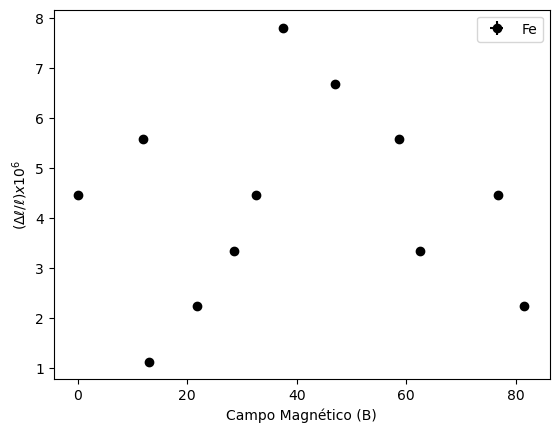

In [33]:
import matplotlib.pyplot as plt
import numpy as np


# Crear gráfica
plt.errorbar(B_Fe, frac_l_Fe, xerr=dB_Fe, yerr=dfrac_l_Fe, fmt='o', color = 'black', label='Fe')

# Añadir etiquetas y título
plt.xlabel('Campo Magnético (B)')
plt.ylabel('$(\Delta \ell / \ell) x 10^6$')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


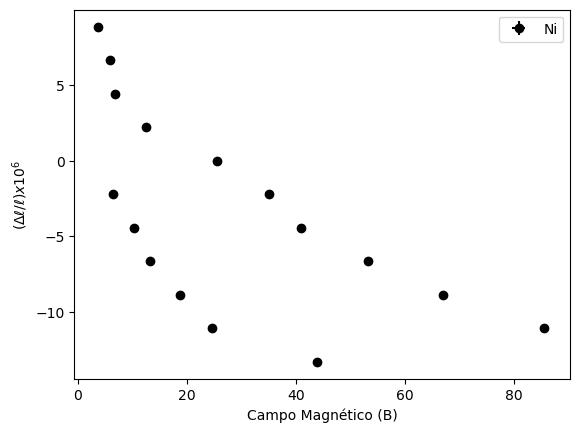

In [34]:
# Crear gráfica
plt.errorbar(B_Ni, frac_l_Ni, xerr=dB_Ni, yerr=dfrac_l_Ni, fmt='o', color = 'black', label='Ni')

# Añadir etiquetas y título
plt.xlabel('Campo Magnético (B)')
plt.ylabel('$(\Delta \ell / \ell) x 10^6$')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

C:\Users\aleja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


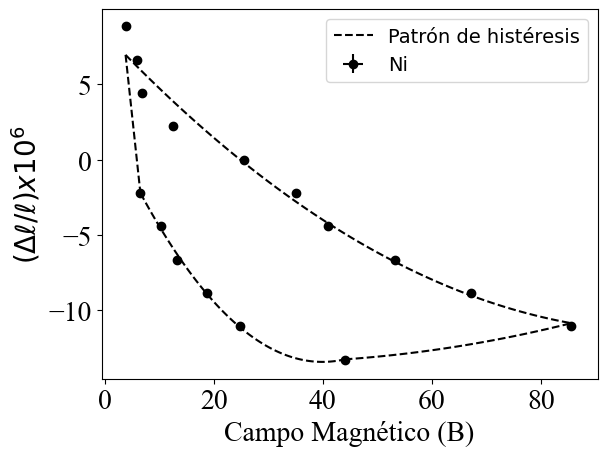

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Dividir los datos en dos conjuntos
B_set1, frac_l_set1 = B_Ni[:6], frac_l_Ni[:6]
B_set2, frac_l_set2 = B_Ni[6:], frac_l_Ni[6:]

# Ajuste polinómico para el primer conjunto
degree_set1 = 2
coefficients_set1 = np.polyfit(B_set1, frac_l_set1, degree_set1)
polynomial_set1 = np.poly1d(coefficients_set1)

# Ajuste polinómico para el segundo conjunto
degree_set2 = 2
coefficients_set2 = np.polyfit(B_set2, frac_l_set2, degree_set2)
polynomial_set2 = np.poly1d(coefficients_set2)

# Ajuste lineal para conectar los extremos de los dos conjuntos
degree_connect = 2
coefficients_connect1 = np.polyfit([B_set1[-1], B_set2[0]], [polynomial_set1(B_set1[-1]), polynomial_set2(B_set2[0])], degree_connect)
polynomial_connect1 = np.poly1d(coefficients_connect1)

coefficients_connect2 = np.polyfit([B_set2[-1], B_set1[0]], [polynomial_set2(B_set2[-1]), polynomial_set1(B_set1[0])], 1)
polynomial_connect2 = np.poly1d(coefficients_connect2)

# Crear gráfica
plt.errorbar(B_Ni, frac_l_Ni, xerr=dB_Ni, yerr=dfrac_l_Ni, fmt='o', color='black', label='Ni')

# Crear datos suavizados para las líneas
B_smooth_set1 = np.linspace(min(B_set1), max(B_set1), 100)
frac_l_smooth_set1 = polynomial_set1(B_smooth_set1)

B_smooth_connect1 = np.linspace(B_set1[-1], B_set2[0], 100)
frac_l_smooth_connect1 = polynomial_connect1(B_smooth_connect1)

B_smooth_set2 = np.linspace(min(B_set2), max(B_set2), 100)
frac_l_smooth_set2 = polynomial_set2(B_smooth_set2)

B_smooth_connect2 = np.linspace(B_set2[-1], B_set1[0], 100)
frac_l_smooth_connect2 = polynomial_connect2(B_smooth_connect2)

# Añadir las líneas suaves
plt.plot(B_smooth_set1, frac_l_smooth_set1,linestyle='dashed', color='black')
plt.plot(B_smooth_connect1, frac_l_smooth_connect1,linestyle='dashed', color='black')
plt.plot(B_smooth_set2, frac_l_smooth_set2,linestyle='dashed', color='black')
plt.plot(B_smooth_connect2, frac_l_smooth_connect2, label='Patrón de histéresis',linestyle='dashed', color='black')

# Añadir etiquetas y título
plt.xlabel('Campo Magnético (B)')
plt.ylabel('$(\Delta \ell / \ell) x 10^6$')

# Mostrar leyenda
plt.legend()

# Añadir etiquetas y título con letra en Times New Roman y tamaño de 20 puntos
plt.xlabel('Campo Magnético (B)', fontname='Times New Roman', fontsize=20)
plt.ylabel('$(\Delta \ell / \ell) x 10^6$', fontname='Times New Roman', fontsize=20)

# Cambiar el tamaño de la leyenda
plt.legend(fontsize=14)

# Cambiar el tamaño de los ticks en los ejes
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)

# Mostrar la gráfica
plt.show()


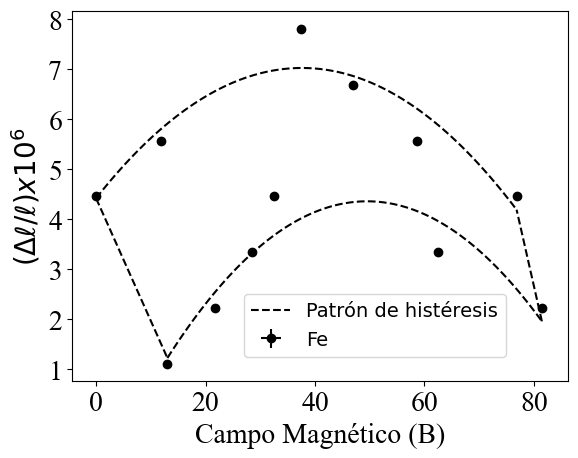

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Dividir los datos en dos conjuntos
B_set1, frac_l_set1 = B_Fe[:6], frac_l_Fe[:6]
B_set2, frac_l_set2 = B_Fe[6:], frac_l_Fe[6:]

# Ajuste polinómico para el primer conjunto
degree_set1 = 2
coefficients_set1 = np.polyfit(B_set1, frac_l_set1, degree_set1)
polynomial_set1 = np.poly1d(coefficients_set1)

# Ajuste polinómico para el segundo conjunto
degree_set2 = 2
coefficients_set2 = np.polyfit(B_set2, frac_l_set2, degree_set2)
polynomial_set2 = np.poly1d(coefficients_set2)

# Ajuste lineal para conectar los extremos de los dos conjuntos
degree_connect = 1
coefficients_connect1 = np.polyfit([B_set1[-1], B_set2[0]], [polynomial_set1(B_set1[-1]), polynomial_set2(B_set2[0])], degree_connect)
polynomial_connect1 = np.poly1d(coefficients_connect1)

coefficients_connect2 = np.polyfit([B_set2[-1], B_set1[0]], [polynomial_set2(B_set2[-1]), polynomial_set1(B_set1[0])], degree_connect)
polynomial_connect2 = np.poly1d(coefficients_connect2)

# Crear gráfica
plt.errorbar(B_Fe, frac_l_Fe, xerr=dB_Fe, yerr=dfrac_l_Fe, fmt='o', color='black', label='Fe')

# Crear datos suavizados para las líneas
B_smooth_set1 = np.linspace(min(B_set1), max(B_set1), 100)
frac_l_smooth_set1 = polynomial_set1(B_smooth_set1)

B_smooth_connect1 = np.linspace(B_set1[-1], B_set2[0], 100)
frac_l_smooth_connect1 = polynomial_connect1(B_smooth_connect1)

B_smooth_set2 = np.linspace(min(B_set2), max(B_set2), 100)
frac_l_smooth_set2 = polynomial_set2(B_smooth_set2)

B_smooth_connect2 = np.linspace(B_set2[-1], B_set1[0], 100)
frac_l_smooth_connect2 = polynomial_connect2(B_smooth_connect2)

# Añadir las líneas suaves
plt.plot(B_smooth_set1, frac_l_smooth_set1,linestyle='dashed', color='black')
plt.plot(B_smooth_connect1, frac_l_smooth_connect1,linestyle='dashed', color='black')
plt.plot(B_smooth_set2, frac_l_smooth_set2,linestyle='dashed', color='black')
plt.plot(B_smooth_connect2, frac_l_smooth_connect2, label='Patrón de histéresis',linestyle='dashed', color='black')

# Añadir etiquetas y título
plt.xlabel('Campo Magnético (B)')
plt.ylabel('$(\Delta \ell / \ell) x 10^6$')

# Mostrar leyenda
plt.legend()

# Añadir etiquetas y título con letra en Times New Roman y tamaño de 20 puntos
plt.xlabel('Campo Magnético (B)', fontname='Times New Roman', fontsize=20)
plt.ylabel('$(\Delta \ell / \ell) x 10^6$', fontname='Times New Roman', fontsize=20)

# Cambiar el tamaño de la leyenda
plt.legend(fontsize=14, loc='center', bbox_to_anchor=(0.61, 0.15))

# Cambiar el tamaño de los ticks en los ejes
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)

# Mostrar la gráfica
plt.show()

Note que en el Níquel se forma la típica de una histéresis al ajusterle unos polinomios arbitrarios con la herramineta de numpy en Python. No obstante, aunque para el caso del hierro si se forma una figura cerrada esta no tiene similitud aun patrón de histéresis típico.